In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import datetime as dt
import yfinance as yf

In [37]:
start=dt.datetime(2010,1,1)
end=dt.datetime(2024,5,4)

data=yf.download('TCS.BO',start,end)

data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,375.350006,378.950012,374.000000,375.850006,235.607483,205618
2010-01-05,378.125000,379.899994,373.049988,375.450012,235.356766,361778
2010-01-06,376.450012,376.500000,365.000000,366.899994,229.997101,568174
2010-01-07,366.500000,367.899994,355.500000,357.325012,223.994797,843042
2010-01-08,350.000000,358.000000,348.299988,350.250000,219.559830,899818


In [38]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-26,3859.649902,3875.850098,3801.250000,3812.850098,3776.563232,114191
2024-04-29,3825.600098,3877.699951,3820.000000,3870.600098,3833.763672,22303
2024-04-30,3870.600098,3880.000000,3810.000000,3822.600098,3786.220703,98711
2024-05-02,3800.000000,3870.199951,3782.500000,3863.750000,3826.978760,76798
2024-05-03,3881.649902,3893.300049,3798.050049,3839.350098,3802.811279,149072


In [39]:
data=data.reset_index()
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,375.350006,378.950012,374.000000,375.850006,235.607483,205618
1,2010-01-05,378.125000,379.899994,373.049988,375.450012,235.356766,361778
2,2010-01-06,376.450012,376.500000,365.000000,366.899994,229.997101,568174
3,2010-01-07,366.500000,367.899994,355.500000,357.325012,223.994797,843042
4,2010-01-08,350.000000,358.000000,348.299988,350.250000,219.559830,899818


In [40]:
# data=data.drop(["Date",'Adj Close'],axis=1)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,375.350006,378.950012,374.000000,375.850006,235.607483,205618
1,2010-01-05,378.125000,379.899994,373.049988,375.450012,235.356766,361778
2,2010-01-06,376.450012,376.500000,365.000000,366.899994,229.997101,568174
3,2010-01-07,366.500000,367.899994,355.500000,357.325012,223.994797,843042
4,2010-01-08,350.000000,358.000000,348.299988,350.250000,219.559830,899818


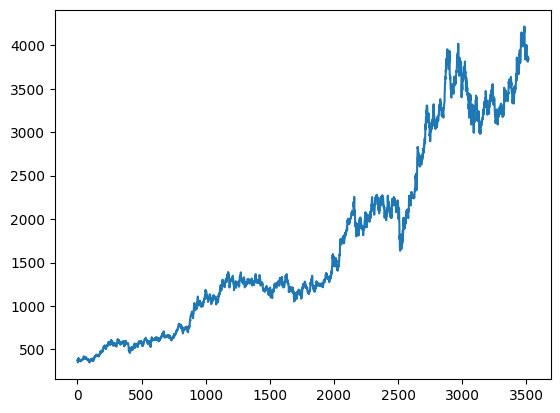

In [41]:
plt.plot(data.Close)

In [42]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,375.350006,378.950012,374.000000,375.850006,235.607483,205618
1,2010-01-05,378.125000,379.899994,373.049988,375.450012,235.356766,361778
2,2010-01-06,376.450012,376.500000,365.000000,366.899994,229.997101,568174
3,2010-01-07,366.500000,367.899994,355.500000,357.325012,223.994797,843042
4,2010-01-08,350.000000,358.000000,348.299988,350.250000,219.559830,899818
...,...,...,...,...,...,...,...
3511,2024-04-26,3859.649902,3875.850098,3801.250000,3812.850098,3776.563232,114191
3512,2024-04-29,3825.600098,3877.699951,3820.000000,3870.600098,3833.763672,22303
3513,2024-04-30,3870.600098,3880.000000,3810.000000,3822.600098,3786.220703,98711
3514,2024-05-02,3800.000000,3870.199951,3782.500000,3863.750000,3826.978760,76798


In [43]:
ma100=data.Close.rolling(100).mean()
ma100

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
3511    3891.343999
3512    3895.345500
3513    3898.440500
3514    3902.144001
3515    3905.441501
Name: Close, Length: 3516, dtype: float64

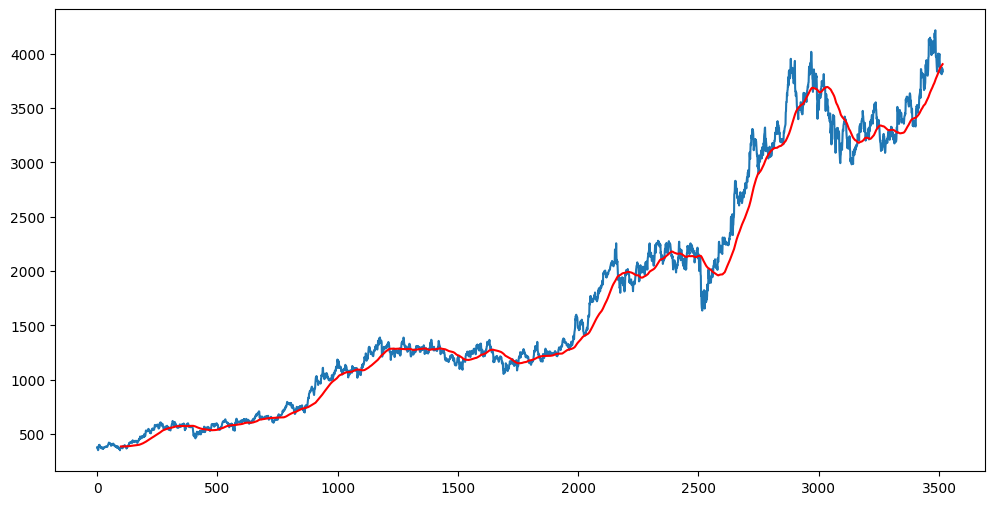

In [44]:
plt.figure(figsize=(12,6))
plt.plot(data.Close)
plt.plot(ma100,'r')

In [45]:
ma200=data.Close.rolling(200).mean()
ma200

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
3511    3660.299503
3512    3663.433503
3513    3666.287754
3514    3669.525254
3515    3672.845754
Name: Close, Length: 3516, dtype: float64

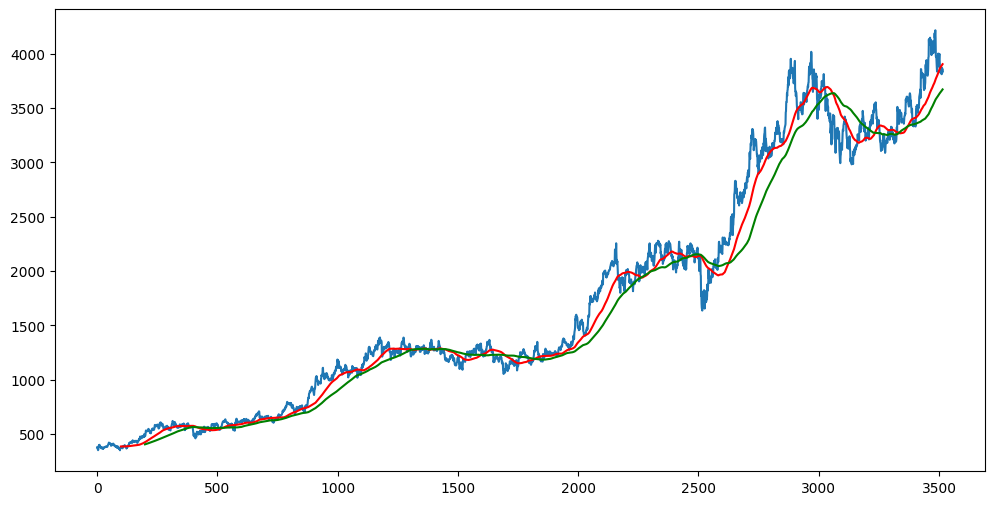

In [46]:
plt.figure(figsize=(12,6))
plt.plot(data.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')


In [47]:
data.shape

(3516, 7)

In [48]:
# Splitting data into Training and Testing
data_training=pd.DataFrame(data['Close'][0:int(len(data)*0.7)])
data_testing=pd.DataFrame(data['Close'][int(len(data)*0.7):int(len(data))])
print(data_training.shape)
print(data_testing.shape)

(2461, 1)
(1055, 1)


In [49]:
data_training.head()

,Close
0,375.850006
1,375.450012
2,366.899994
3,357.325012
4,350.250000


In [50]:
data_testing.head()

,Close
2461,2161.300049
2462,2169.800049
2463,2157.449951
2464,2200.399902
2465,2200.149902


In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [52]:
# pip install scikit-learn

In [53]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.01372029],
       [0.01351299],
       [0.00908207],
       ...,
       [0.95960358],
       [0.95810062],
       [0.95019753]])

In [54]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)
x_train.shape

(2361, 100, 1)

In [55]:
# pip install keras
# pip install tensorflow

In [74]:
from keras.layers import Dense,Dropout,LSTM
from tensorflow.keras.models import Sequential


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\muskan\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\muskan\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1053, in launch_instance
    app.start()
  File "C:\Users\muskan\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 737, in start
    self.io

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import

In [73]:
model = Sequential()


model.add(LSTM(units=50,activation='relu',return_sequences=True,
               input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))



model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))


                  
model.add(Dense(units=1))


NameError: name 'Sequential' is not defined

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

NameError: name 'model' is not defined

In [20]:
model.save('keras_model.h5')

In [30]:
data_testing.head()

,Close
2449,2016.750000
2450,2071.699951
2451,2127.550049
2452,2165.649902
2453,2167.250000


In [31]:
data_training.tail(100)

,Close
2444,2121.500000
2445,2122.949951
2446,2060.699951
2447,2012.500000
2448,2041.199951


In [33]:
past_100_days=data_training.tail(100)
print(type(past_100_days))
print(type(data_testing))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [34]:
final_data = pd.concat([past_100_days, data_testing], ignore_index=True)

In [35]:
final_data.head()

,Close
0,2145.199951
1,2105.300049
2,2117.149902
3,2065.600098
4,2076.949951


In [36]:
input_data = scaler.fit_transform(final_data)
input_data

array([[0.19721855],
       [0.18176186],
       [0.18635234],
       ...,
       [0.89530875],
       [0.91692494],
       [0.90782136]])

In [47]:
input_data.shape

(855, 1)

In [38]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [39]:
x_test,y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1050, 100, 1)
(1050,)


In [40]:
# Making Predictions
y_predicted = model.predict(x_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step


In [51]:
y_predicted.shape

(755, 1)

In [41]:
y_test

array([0.14745875, 0.16874563, 0.19038122, ..., 0.89530875, 0.91692494,
       0.90782136])

In [42]:
y_predicted

array([[0.21681608],
       [0.21581063],
       [0.2147986 ],
       ...,
       [0.87512594],
       [0.8706263 ],
       [0.8693636 ]], dtype=float32)

In [43]:
s=scaler.scale_

array([0.00038739])

In [55]:
# scale_factor =1/0.02123255
scale_factor =1/s
_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor


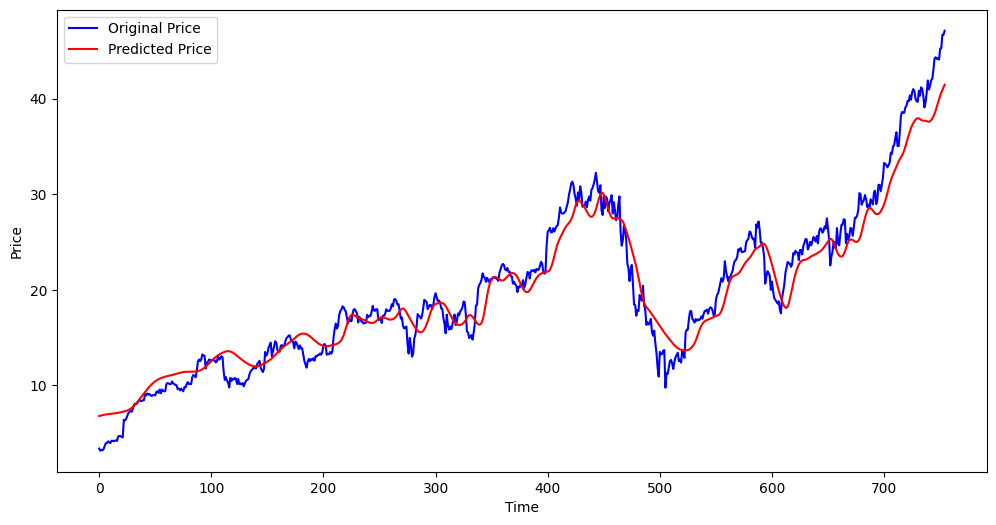

In [58]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label="Original Price")
plt.plot(y_predicted,'r',label="Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()